# Prinsip-Prinsip Dasar dari Machine Learning

Oleh Afif Akbar Iskandar

Kita akan mulai "menyelam" pada prinsip-prinsip dasar dari machine learning, dan bagaimana cara mengimplementasikannya via Scikit-Learn API.

Bagian ini mencover **klasifikasi** dan **regresi**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

## Objek Estimator

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [4]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


Buat fungsi Y = 2*X + 1

In [5]:
x = np.arange(10)
y = 2 * x + 1

In [6]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


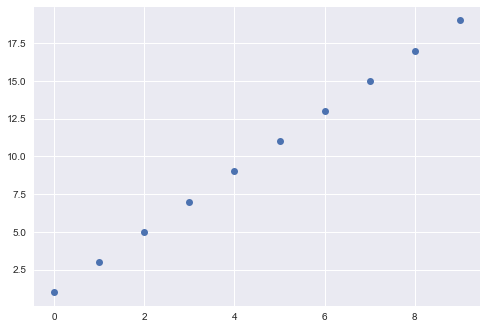

In [7]:
plt.plot(x, y, 'o');

In [8]:
X = x[:, np.newaxis] #Ubah kedalam bentuk yang dikenal scikit-learn
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [9]:
model.fit(X, y) #fit model dengan data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [10]:
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


In [11]:
model.residues_ # print residual error

/Users/afifai/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


7.6200430943719212e-31

Model yang dihasilkan adalah slope = 2 dan intercept = 1.

## Supervised Learning (Klasifikasi dan Regresi)

Pada **Supervised Learning**, data yang dibutuhkan adalah Fitur pada setiap sampel, dan label yang bersesuaian.

Contoh supervised learning:
- Diberikan data riwayat applicants kartu kredit beserta hasilnya (diterima atau tidak) untuk membuat model apakah pendaftar kartu kredit dimasa depan akan diterima aplikasinya atau tidak (klasifikasi)
- Diberikan data riwayat harga rumah dari tahun ke tahun di kompleks X untuk membuat model harga rumah dimasa depan (regresi)

### Contoh Klasifikasi

K nearest neighbors (kNN) adalah salah satu algoritma pembelajaran yang paling sederhana: diberikan data baru, maka kNN akan mencarikan fitur yang paling dekat sehingga kelas data baru tersebut akan sama dengan data hasil belajarnya

In [12]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# buat model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit model
knn.fit(X, y)

# Iris jenis apa yang memiliki 3cm x 5cm sepal dan 4cm x 2cm petal?
# panggil method predict
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


Anda juga bisa melihat hasilnya dalam versi probabilistik

In [13]:
knn.predict_proba([[3, 5, 4, 2],])

array([[ 0. ,  0.8,  0.2]])

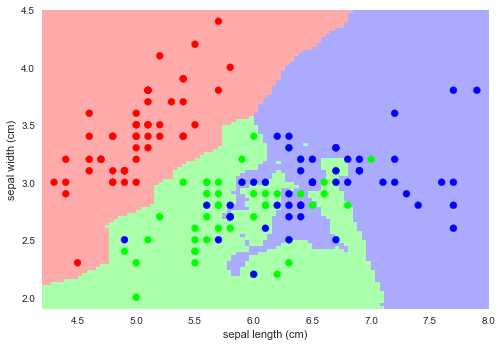

In [14]:
from fig_code import plot_iris_knn
plot_iris_knn()

### Latihan
Gunakan SVM untuk memprediksi hal yang sama seperti diatas

In [15]:
from sklearn.svm import SVC


#kode anda


### Contoh Regresi

Contoh regresi yang paling sederhana adalah `fitting` garis kedalam data kita

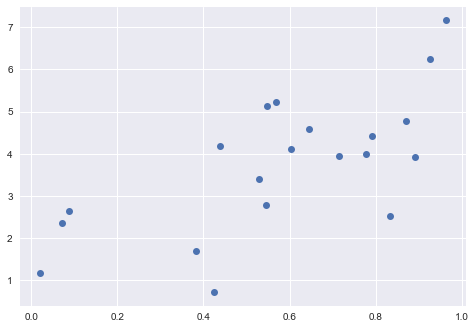

In [16]:
# Buat data yang simpel
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

Plot garis terbaik menggunakan regresi linear

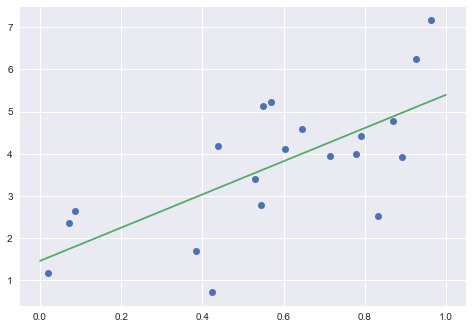

In [17]:
model = LinearRegression()
model.fit(X, y)

# Plot data dan garis
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Scikit-learn mempunyai `regresor` lain yang lebih kompleks (mis. random forest)

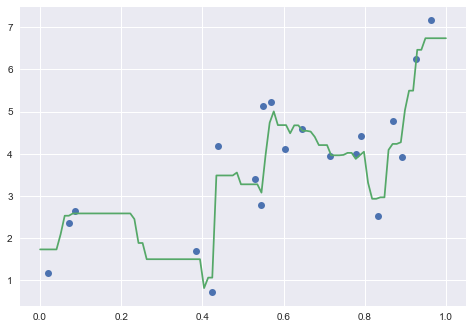

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot data dan garis
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

## Unsupervised Learning: Reduksi Dimensi dan Klaster

Pada **Unupervised Learning**, data yang dibutuhkan hanya Fitur pada setiap sampel saja (tanpa label.

Contoh Unsupervised learning:
- Diberikan data kumpulan berita hari ini, tentukanlah berita paling penting pada hari itu (Reduksi Dimensi)
- Diberikan data mahasiswa suatu Universitas, kelompokkan sesuai dengan kemampuan finansial untuk distribusi beasiswa (Klaster)

### Reduksi Dimensi : PCA

Principle Component Analysis (PCA) adalah salah satu teknik reduksi dimensi, secara teknis akan dipelajari di pertemuan selanjutnya

Pengaplikasian pada Iris-dataset (4D to 2D)

In [19]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


Arti dari 2 componen:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


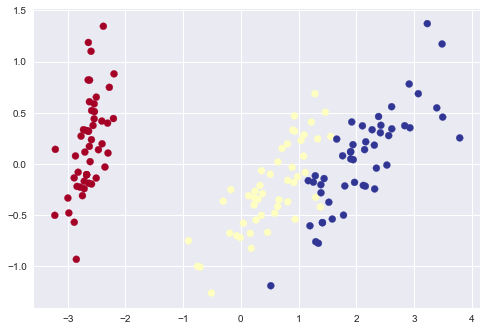

In [20]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Arti dari 2 componen:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

### Klaster : K-Means

K-Means merupakan teknik klaster paling sederhana (berdasarkan jarak)

akan diaplikasikan pada iris dataset

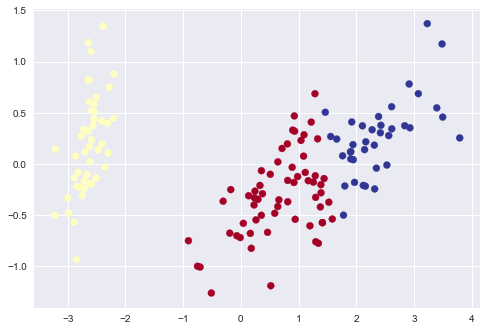

In [21]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

## Validasi dan Evaluasi Model

Metode validasi sederhana

In [22]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


Validasi dengan Confussion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


Evaluasi dengan cross-validation

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print("akurasi metode ini" , accuracy_score(ypred,ytest))

akurasi metode ini 0.947368421053


/Users/afifai/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
